# Milestone 1: Data Cleaning, Integration, and EDA
### Case: Retail Price Optimization (Suddharshan S, Kaggle)


## 1. Setup

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path




# Set your base directory to your GitHub clone folder
BASE_DIR = Path(r"C:\Users\ENGR. JOHN\Milestone-1-Project")

# Define subdirectories and files relative to BASE_DIR
RAW_FILE = BASE_DIR / "archive_contents" / "retail_price.csv"
SUPP_DIR = BASE_DIR / "supplementary"
PROCESSED_DIR = BASE_DIR / "data" / "processed"
PLOTS_DIR = BASE_DIR / "notebook_plots"

# Make sure the directories exist (they’ll be created if missing)
for d in [SUPP_DIR, PROCESSED_DIR, PLOTS_DIR]:
    d.mkdir(parents=True, exist_ok=True)

## 2. Load Raw Data

In [30]:
df_raw = pd.read_csv(RAW_FILE)
print('Raw shape:', df_raw.shape)
df_raw.head()

Raw shape: (676, 30)


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## 3. Data Cleaning

In [31]:
# Copy raw data
df = df_raw.copy()

# Standardize column names
df.columns = [c.strip().lower().replace(' ','_') for c in df.columns]

# Check duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# 🔹 Check missing values BEFORE cleaning
missing_before = df.isnull().sum()[df.isnull().sum() > 0]
print("\nMissing values BEFORE cleaning:")
print(missing_before if not missing_before.empty else "No missing values detected.")

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Handle missing values (robustness step — even if none exist now)
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())  # median for numeric
for c in cat_cols:
    mode_val = df[c].mode().iloc[0] if not df[c].mode().empty else "missing"
    df[c] = df[c].fillna(mode_val)        # mode for categorical

# Ensure numeric columns are properly cast
for c in ['unit_price', 'qty', 'total_price', 'product_weight_g']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0)

# 🔹 Check missing values AFTER cleaning
missing_after = df.isnull().sum()[df.isnull().sum() > 0]
print("\nMissing values AFTER cleaning:")
print(missing_after if not missing_after.empty else "No missing values remain (robustness ensured).")

# Display top rows
df.head()

Duplicates before: 0
Shape after dropping duplicates: (676, 30)

Missing values BEFORE cleaning:
No missing values detected.

Missing values AFTER cleaning:
No missing values remain (robustness ensured).


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## 4. Supplementary Data Creation (Synthetic)

In [ ]:
np.random.seed(42)
product_ids = df['product_id'].drop_duplicates().values

brands = ['BrandA','BrandB','BrandC','BrandD']
cats = ['Electronics','Clothing','Grocery','Furniture','Toys']
product_info = pd.DataFrame({'product_id': product_ids})
product_info['brand'] = np.random.choice(brands, size=len(product_info))
product_info['category_level2'] = np.random.choice(cats, size=len(product_info))

competitor_prices = df[['product_id','unit_price']].drop_duplicates().copy()
competitor_prices['competitor_price'] = competitor_prices['unit_price'] * np.random.uniform(0.7,1.3,size=len(competitor_prices))

promotions = pd.DataFrame({'product_id': product_ids})
promotions['promotion_flag'] = np.random.choice([0,1], size=len(promotions), p=[0.7,0.3])

product_info.to_csv(SUPP_DIR/'product_info.csv', index=False)
competitor_prices.to_csv(SUPP_DIR/'competitor_prices.csv', index=False)
promotions.to_csv(SUPP_DIR/'promotions.csv', index=False)
product_info.head()

## 5. Integration

In [ ]:
df_m = (df
        .merge(product_info, on='product_id', how='left')
        .merge(competitor_prices[['product_id','competitor_price']], on='product_id', how='left')
        .merge(promotions, on='product_id', how='left')
       )
print('Shape after merge:', df_m.shape)
df_m.head()

## 6. Data transformation 

In [33]:


# 1. Revenue (already included)
df_m['revenue'] = df_m['total_price'] * df_m['qty']

# 2. Price Gap vs competitor
df_m['price_gap'] = df_m['unit_price'] - df_m['competitor_price']

# 3. Discount flag
df_m['is_discounted'] = (df_m['promotion_flag'] == 1).astype(int)

# 4. Avg weight per unit & price per gram
df_m['avg_weight_per_unit'] = df_m['product_weight_g'] / df_m['qty'].replace(0, np.nan)
df_m['price_per_gram'] = df_m['unit_price'] / df_m['product_weight_g'].replace(0, np.nan)


# 5. Seasonality variables
# Convert month_year into datetime
if 'month_year' in df_m.columns:
    df_m['month_year'] = pd.to_datetime(df_m['month_year'], format='%m-%d-%Y', errors='coerce')
    df_m['month'] = df_m['month_year'].dt.month
    df_m['quarter'] = df_m['month_year'].dt.quarter
    df_m['is_holiday_season'] = df_m['month'].isin([11, 12]).astype(int)

# 6. Scaling / Normalization (min-max scaling for numeric fields)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_m[['unit_price_scaled', 'qty_scaled']] = scaler.fit_transform(df_m[['unit_price', 'qty']])



# 7. Elasticity variables (log-transforms)
df_m['log_price'] = np.log1p(df_m['unit_price'])
df_m['log_qty'] = np.log1p(df_m['qty'])



eda_path = Path(r"C:\Users\ENGR. JOHN\Milestone-1-Project\data\processed\retail_pricing_EDA.csv")
df_m.to_csv(eda_path, index=False)
print("EDA-friendly dataset saved to:", eda_path)

# Preview transformed dataset
df_m.head()

EDA-friendly dataset saved to: C:\Users\ENGR. JOHN\Milestone-1-Project\data\processed\retail_pricing_EDA.csv


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,price_gap,is_discounted,avg_weight_per_unit,price_per_gram,unit_price_scaled,qty_scaled,log_price,log_qty,quarter,is_holiday_season
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,5.616739,0,350.000000,0.131286,0.075705,0.000000,3.849083,0.693147,1,0
1,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,13.558586,0,350.000000,0.131286,0.075705,0.000000,3.849083,0.693147,1,0
2,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,17.581820,0,350.000000,0.131286,0.075705,0.000000,3.849083,0.693147,1,0
3,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,8.513436,0,350.000000,0.131286,0.075705,0.000000,3.849083,0.693147,1,0
4,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,5.616739,0,116.666667,0.131286,0.075705,0.016529,3.849083,1.386294,1,0


## 7. Exploratory Data Analysis (EDA)

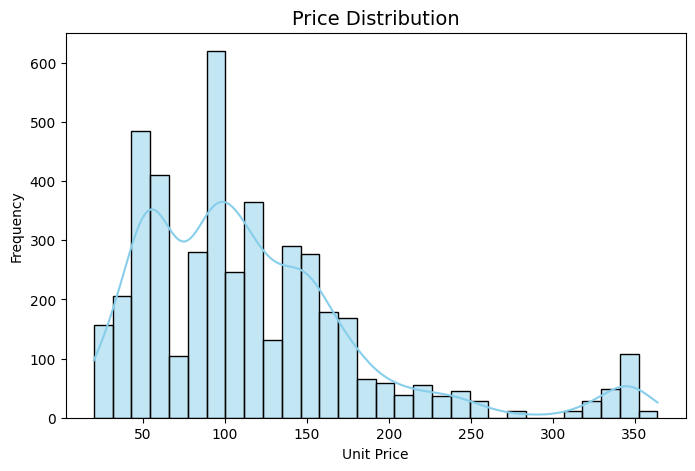

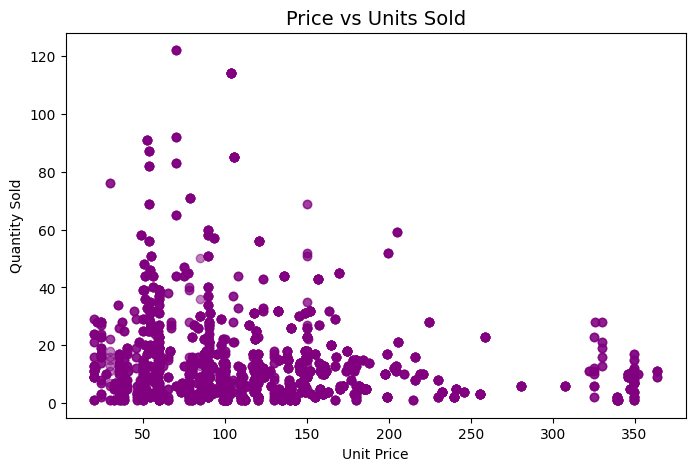

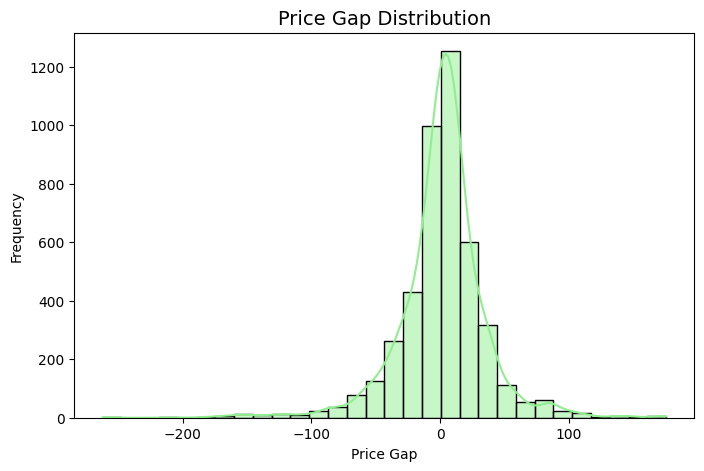

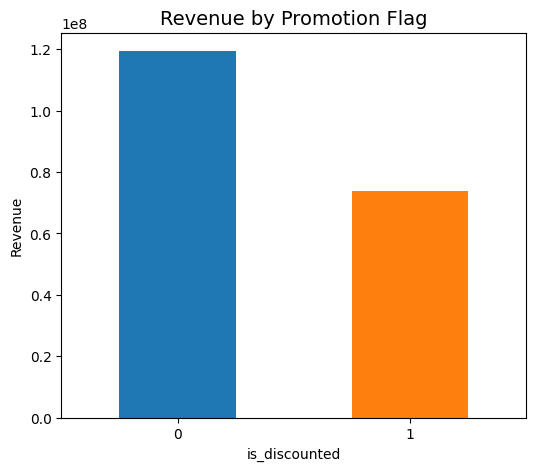

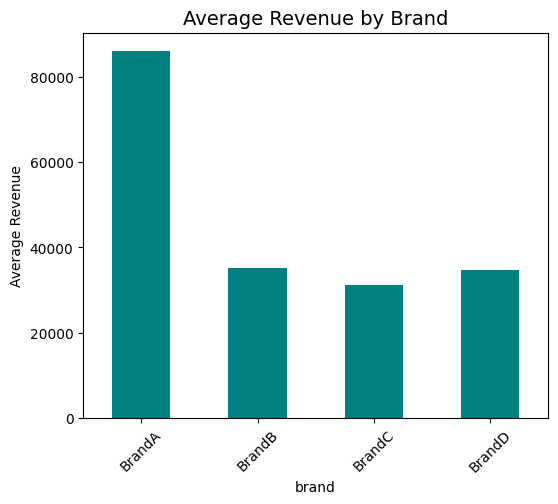

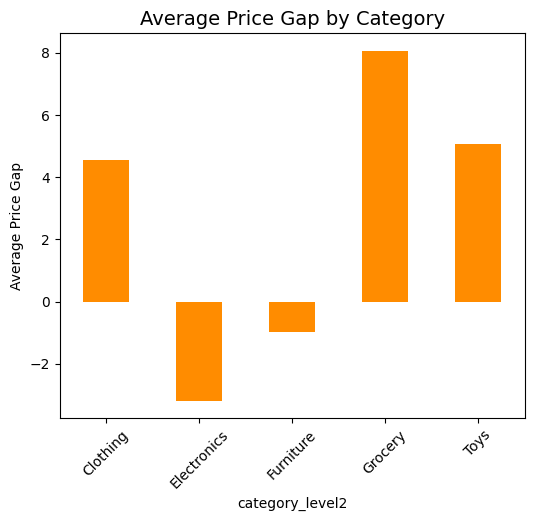

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Price Distribution 
plt.figure(figsize=(8,5))
sns.histplot(df_m['unit_price'].dropna(), bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.savefig(PLOTS_DIR / "price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# 2. Price vs Units Sold
plt.figure(figsize=(8,5))
plt.scatter(df_m['unit_price'], df_m['qty'], alpha=0.5, color="purple")
plt.title("Price vs Units Sold", fontsize=14)
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.savefig(PLOTS_DIR / "price_vs_units.png", dpi=300, bbox_inches="tight")
plt.show()

# 3. Price Gap Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_m['price_gap'].dropna(), bins=30, kde=True, color="lightgreen", edgecolor="black")
plt.title("Price Gap Distribution", fontsize=14)
plt.xlabel("Price Gap")
plt.ylabel("Frequency")
plt.savefig(PLOTS_DIR / "Price Gap Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# 4. Revenue by Promotion Flag
rev_by_promo = df_m.groupby('is_discounted')['revenue'].sum()
plt.figure(figsize=(6,5))
rev_by_promo.plot(kind='bar', color=["#1f77b4","#ff7f0e"])
plt.title("Revenue by Promotion Flag", fontsize=14)
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.savefig(PLOTS_DIR / "Revenue by Promotion Flag", dpi=300, bbox_inches="tight")
plt.show()

# 5. Average Revenue by Brand
brand_rev = df_m.groupby('brand')['revenue'].mean()
plt.figure(figsize=(6,5))
brand_rev.plot(kind='bar', color="teal")
plt.title("Average Revenue by Brand", fontsize=14)
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.savefig(PLOTS_DIR / "Average Revenue by Brand", dpi=300, bbox_inches="tight")
plt.show()

# 6. Average Price Gap by Category
cat_gap = df_m.groupby('category_level2')['price_gap'].mean()
plt.figure(figsize=(6,5))
cat_gap.plot(kind='bar', color="darkorange")
plt.title("Average Price Gap by Category", fontsize=14)
plt.ylabel("Average Price Gap")
plt.xticks(rotation=45)
plt.savefig(PLOTS_DIR / "Average Price Gap by Category", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# --- Encoding (after EDA, for ML models) ---
df_final = pd.get_dummies(df_m, columns=['brand','category_level2'], drop_first=True)


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,log_qty,quarter,is_holiday_season,brand_BrandB,brand_BrandC,brand_BrandD,category_level2_Electronics,category_level2_Furniture,category_level2_Grocery,category_level2_Toys
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
1,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
2,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
3,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
4,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,1.386294,1,0,False,True,False,False,False,True,False


In [ ]:
## 8. Save Final Dataset

In [36]:
final_path = PROCESSED_DIR/'retail_pricing_enhanced.csv'
df_final.to_csv(final_path, index=False)
print('Saved final dataset to:', final_path)
df_final.head()

Saved final dataset to: C:\Users\ENGR. JOHN\Milestone-1-Project\data\processed\retail_pricing_enhanced.csv


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,log_qty,quarter,is_holiday_season,brand_BrandB,brand_BrandC,brand_BrandD,category_level2_Electronics,category_level2_Furniture,category_level2_Grocery,category_level2_Toys
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
1,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
2,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
3,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.693147,1,0,False,True,False,False,False,True,False
4,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,1.386294,1,0,False,True,False,False,False,True,False
